In [438]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [439]:
torch.__version__

'2.6.0'

In [440]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)

y = weight * X  + bias

In [441]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [442]:
len(X), len(y)

(50, 50)

In [443]:
# create the split of 40 per and 10 per
train_size = int(0.8 * len(X))
train_size

X_train , y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [444]:
# Visulaize

def plot_predition(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,predition=None):
    plt.scatter(X_train,y_train,c="g", label="Training")
    
    plt.scatter(X_test, y_test, c="r", label="Test data")
    
    if predition is not None:
        plt.scatter(X_test, predition, c="y", label= "Preds" )
        
    plt.legend()

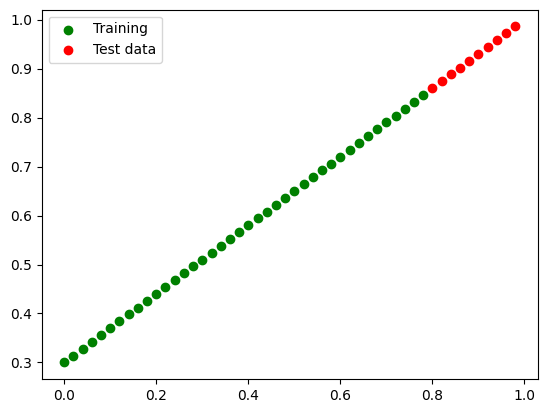

In [445]:
plot_predition()

In [446]:
torch.rand(1)

tensor([0.3904])

In [447]:
torch.randn(1)

tensor([0.3258])

In [448]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        
    #forward pass
    
    def forward(self,x: torch.Tensor) -> torch.Tensor : 
        # w*x +b 
        return self.weights * x + self.bias
        

In [449]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

model_0
# check out ther parameter

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [450]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

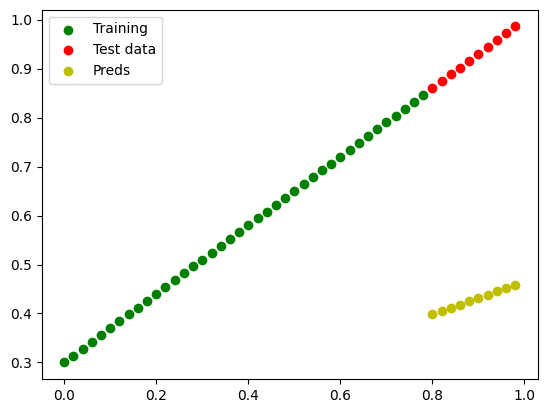

In [451]:
#to check models predictive power

with torch.inference_mode():
    pred = model_0(X_test)    




plot_predition(predition=pred)

In [452]:
loss = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [453]:
# Building a training loop and testing loop
# Track values
epoch_count = []
test_loss_count = []
train_loss_count = []


epochs = 200

for epoch in range(epochs):
    
    # training mode on
    model_0.train()
    
    # prediction with train data
    pred = model_0(X_train)
    
    # calculate loss
    train_loss = loss(pred, y_train)

    # optimizer to zero grad
    optimizer.zero_grad()
    
    # backpropagation
    train_loss.backward()
    
    # update parameters
    optimizer.step()
    
    # testing
    model_0.eval()
    
    with torch.inference_mode():
        
        pred = model_0(X_test)
        test_loss = loss(pred, y_test)
        
        if epoch % 10 == 0 :
            
            train_loss_count.append(train_loss)
            test_loss_count.append(test_loss)
            epoch_count.append(epoch)
            print(f"Epoch : {epoch} | train loss : {train_loss} | test_loss : {test_loss}")
        
    
    
    



Epoch : 0 | train loss : 0.31288135051727295 | test_loss : 0.48106518387794495
Epoch : 10 | train loss : 0.1976713389158249 | test_loss : 0.3463551998138428
Epoch : 20 | train loss : 0.08908725529909134 | test_loss : 0.2172965705394745
Epoch : 30 | train loss : 0.053148530423641205 | test_loss : 0.14464019238948822
Epoch : 40 | train loss : 0.04543796554207802 | test_loss : 0.11360953748226166
Epoch : 50 | train loss : 0.04167863354086876 | test_loss : 0.09919948130846024
Epoch : 60 | train loss : 0.03818932920694351 | test_loss : 0.08886633813381195
Epoch : 70 | train loss : 0.03476089984178543 | test_loss : 0.0805937722325325
Epoch : 80 | train loss : 0.03132382780313492 | test_loss : 0.07232122868299484
Epoch : 90 | train loss : 0.027887403964996338 | test_loss : 0.06473556160926819
Epoch : 100 | train loss : 0.024458955973386765 | test_loss : 0.056463055312633514
Epoch : 110 | train loss : 0.021020209416747093 | test_loss : 0.04819049686193466
Epoch : 120 | train loss : 0.017585467

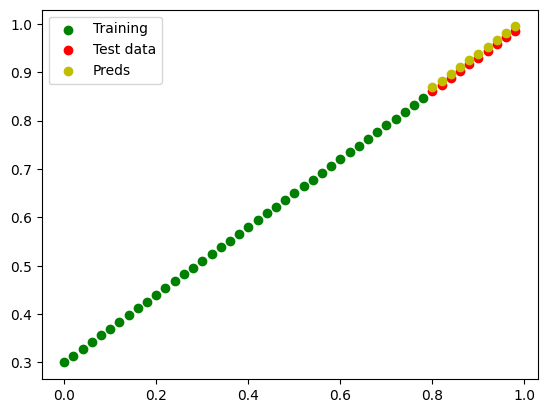

In [454]:
with torch.inference_mode():
    
    pred = model_0(X_test)
plot_predition(predition=pred)

In [455]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

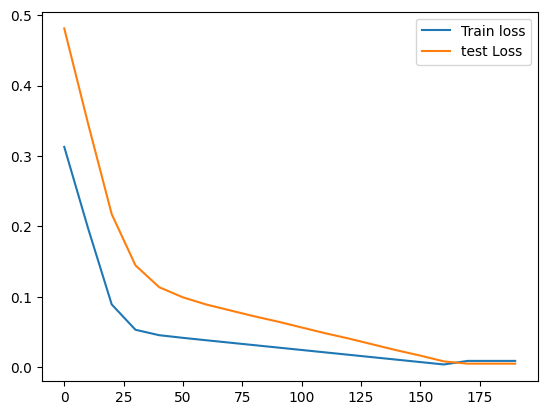

In [472]:
plt.plot(epoch_count, torch.tensor(train_loss_count).numpy(), label="Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_count).numpy(), label="test Loss")

plt.legend()

In [473]:
# saving the model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "samray.pt"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj = model_0.state_dict(), f=MODEL_SAVE_PATH)